<a href="https://colab.research.google.com/github/atoothman/croton-cholera-analysis/blob/main/notebooks/02_descriptives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 02: Descriptive and Exploratory Analysis
## Project: Croton Cholera Ward-Level Analysis

Purpose:
This notebook conducts exploratory descriptive analysis of ward-level demographic, housing and sanitary infrastructure variables relevant to the 1849 cholera outbreak in New York City.

Goals:

*   To examine the distribution of cholera mortality across wards
*   Summarize population and density
*   Describe the spatial distribution of sewer and water infrastucture
*   Assess preliminary associations among mortality, density, housing exposure, and infrastructure variables
* Identify structural patterns that will inform subsequent regression modeling


No regression or modeling is preformed in this notebook.



## Clone repository

In [ ]:
# Clone repo into colab
!git clone https://github.com/atoothman/croton-cholera-analysis.git

Cloning into 'croton-cholera-analysis'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 66 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 35.35 KiB | 4.42 MiB/s, done.
Resolving deltas: 100% (15/15), done.


## Import libraries, paths and define paths

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import os

# Define repository and data paths
base_path = "/content/croton-cholera-analysis"
data_path = os.path.join(base_path, "data")

# Load dataset
df = pd.read_csv(os.path.join(data_path, "ward_level_data.csv"))

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (19, 29)


,ward_id,ward_name,population_1830,population_1850,ward_area_1832,ward_area_1849,pop_density_1830,pop_density_1850,cholera_1832_hotspot,cholera_1849_deaths,...,cellar_exposure_rate_1850,cellar_density_1850,stopcock_count_1850,stopcock_density_1850,hydrant_count_1850,hydrant_density_1850,stopcocks_per_sq_mile_1850,hydrants_per_sq_mile_1850,stopcocks_per_1000_1850,hydrants_per_1000_1850
0,1,First Ward,11327.0,19754,0.25,0.25,45308.00000,79016.00000,0.0,31.0,...,0.029766,488.000000,79.0,3.0,106.0,3.0,316.000000,424.000000,3.999190,5.366002
1,2,Second Ward,8202.0,6655,0.12,0.12,68350.00000,55458.33333,0.0,87.0,...,0.029452,350.000000,44.0,2.0,58.0,2.0,366.666667,483.333333,6.611570,8.715252
2,3,Third Ward,9620.0,10355,0.15,0.15,64133.33333,69033.33333,1.0,81.0,...,0.045485,606.666667,45.0,2.0,64.0,2.0,300.000000,426.666667,4.345727,6.180589
3,4,Fourth Ward,12705.0,23250,0.13,0.13,97730.76923,178846.15380,1.0,674.0,...,0.038710,1430.769231,35.0,2.0,48.0,1.0,269.230769,369.230769,1.505376,2.064516
4,5,Fifth Ward,17722.0,22686,0.24,0.24,73841.66667,94525.00000,1.0,165.0,...,0.023847,395.833333,62.0,3.0,88.0,3.0,258.333333,366.666667,2.732963,3.879044


In [ ]:
# Display column names
print("Column names:")
print(df.columns)

Column names:
Index(['ward_id', 'ward_name', 'population_1830', 'population_1850',
       'ward_area_1832', 'ward_area_1849', 'pop_density_1830',
       'pop_density_1850', 'cholera_1832_hotspot', 'cholera_1849_deaths',
       'cholera_1849_rate_per_1000', 'sewer_present_1838',
       'sewer_density_1838', 'sewer_present_1847', 'sewer_density_1847',
       'cellar_or_basement_count_1850', 'cellar_room_count_1850',
       'cellar_inhabitant_count_1850', 'persons_per_room_1850',
       'cellar_exposure_rate_1850', 'cellar_density_1850',
       'stopcock_count_1850', 'stopcock_density_1850', 'hydrant_count_1850',
       'hydrant_density_1850', 'stopcocks_per_sq_mile_1850',
       'hydrants_per_sq_mile_1850', 'stopcocks_per_1000_1850',
       'hydrants_per_1000_1850'],
      dtype='object')


## 1849 Cholera Mortality and Population


*   1850 Population
*   1850 Population Density


*   1849 cholera deaths
*   1849 cholera death rate per 1,000

Investigating:


*   What mortality looks like across wards in 1849
*   How unequal population density is
*   Do rates and counts tell different stories

Establish baseline mortality patterns before regression modeling.





In [ ]:
# Display descriptive statistice for selected 1849 variables
selected_1849 = [
    "population_1850",
    "pop_density_1850",
    "cholera_1849_deaths",
    "cholera_1849_rate_per_1000"
]

df[selected_1849].describe()

,population_1850,pop_density_1850,cholera_1849_deaths,cholera_1849_rate_per_1000
count,19.000000,18.000000,18.000000,18.000000
mean,27134.052632,99571.948544,254.944444,9.976292
std,12236.531364,50653.651360,252.059394,9.127377
min,6655.000000,852.446982,31.000000,1.569302
25%,21159.000000,62996.171167,112.250000,4.360308
50%,24698.000000,92852.083335,155.500000,6.960502
75%,33651.000000,145447.058825,245.750000,12.672321
max,52882.000000,178846.153800,880.000000,35.630415


Interpretation:

cholera_1849_rate_per_1000 = deaths per 1,000 persons by ward


*   mean = ~ 10 deaths per 1,000 residents in a ward
*   std = ~ 9 deaths per 1,000 indicating distribution is not tight
*   min = ~1.57 per 1,000 indicating at least one ward had very low mortality
* 25% of wards had mortality rates below 4.36 per 1,000
* 50% of wards had mortality rates below 7 per 1,000. This is lower than the mean indicating the distribution is right skewed and some wards are pulling the average upward.
* 75% of wards had rates above 12.67 per 1,000. This is almost double the median indicating strong inequality.
* max = ~35.6 deaths per 1,000 indicating one ward has very high mortality. Will need to check but is likely an outlier. This ward will influence regression.
* The max rate of 35.6 compared to the median of 6.96 suggested strong spatial inequality for how cholera mortality affected wards. Which wards and why?



pop_density_1850 = population_1850/ward_area_1849 (persons per sq mile)


Distribution of Population Density 1850

Examine distribution of ward-level population density to assess:
* Degree of crowding variation
* Presence of extreme density wards
* Potential skews

Population Denisty (1850) Summary:


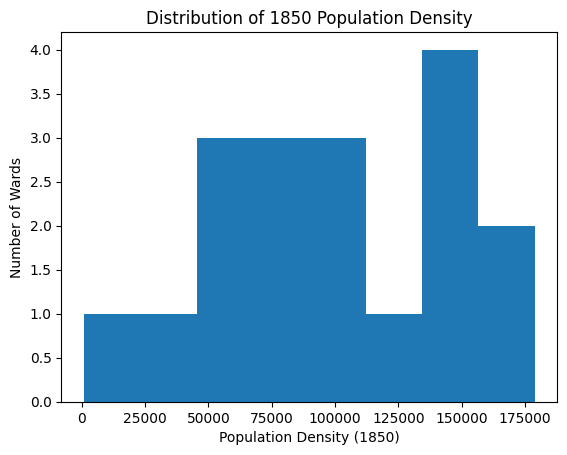

In [ ]:
# Extract 1850 population density values
# drop wards where values are missing
density = df["pop_density_1850"].dropna()

# Plot histogram to visualize distribution
print("Population Denisty (1850) Summary:")

import matplotlib.pyplot as plt

plt.figure()
plt.hist(density, bins=8)
plt.xlabel("Population Density (1850)")
plt.ylabel("Number of Wards")
plt.title("Distribution of 1850 Population Density")
plt.show()


Interpretation of population density distribution:

Histogram of population density shows uneven distribution. Right skewed with one low ward and at least one high density ward.

Low density ward is the 12th ward at population density of 850 persons per sq mile. High density ward include 14th ward at 178,846 persons per sq mile and 13th ward at 166,153 persons per sq mile.

Histogram shows extreme spatial inequality in crowding.

Distribution of 1849 Cholera Mortality Rates

Examine distribution of cholera rates by wards.


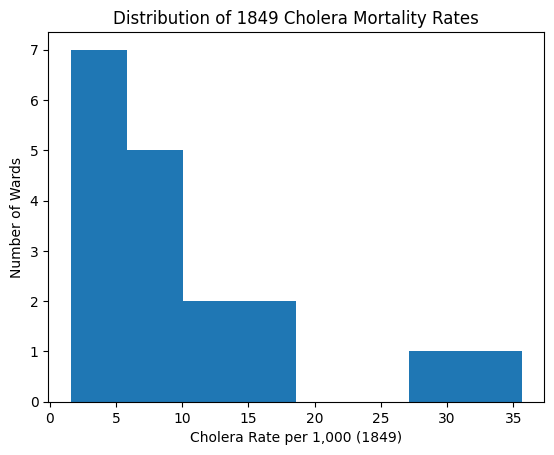

In [ ]:
# Drop missing values for plotting
rates = df["cholera_1849_rate_per_1000"].dropna()

plt.figure()
plt.hist(rates, bins=8)
plt.xlabel("Cholera Rate per 1,000 (1849)")
plt.ylabel("Number of Wards")
plt.title("Distribution of 1849 Cholera Mortality Rates")
plt.show()

Interpretation of cholera mortality distribution:

The distribution of 1849 cholera mortality rates is right skewed. Two wards displaying high mortality rate suggesting spatial concentration instead of uniform disease impact.

Distribution of 1849 Cholera Death Counts

Inspect raw death counts to understand
* Absolute mortality burden
* Variation across wards
* If counts are dominated by a few large wards



Cholera Deaths (1849) Summary:


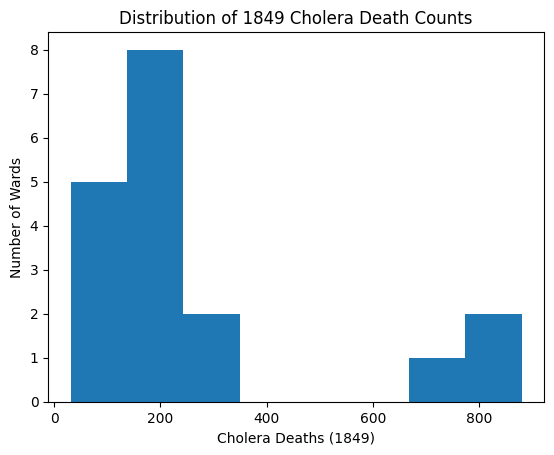

In [ ]:
# Extract 1849 cholera death counts
# drop wards where values are missing
deaths = df["cholera_1849_deaths"].dropna()

# Plot histogram to visualize distribution
print("Cholera Deaths (1849) Summary:")

import matplotlib.pyplot as plt

plt.figure()
plt.hist(deaths, bins=8)
plt.xlabel("Cholera Deaths (1849)")
plt.ylabel("Number of Wards")
plt.title("Distribution of 1849 Cholera Death Counts")
plt.show()


Interpretation of distribution of raw cholera deaths by ward:

 Histogram of cholera death counts (1849) reveals that most wards fall between 50-250 deaths but 3 wards have 700-880 deaths. Indicating a strong right skew. These three wards would have had a disproportionate mortality burden.

## 1849 Cholera Mortality Distribution - High Mortality Wards


Which ward has the highest number of deaths and highest death rate?


In [ ]:
# Identify ward with highest death count
df.loc[df["cholera_1849_deaths"].idxmax(),
       ["ward_id", "ward_name", "cholera_1849_deaths",
        "cholera_1849_rate_per_1000", "population_1850"]]

,5
ward_id,6
ward_name,Sixth Ward
cholera_1849_deaths,880.0
cholera_1849_rate_per_1000,35.630415
population_1850,24698


In [ ]:
# Identify ward with highest rate
df.loc[df["cholera_1849_rate_per_1000"].idxmax(),
       ["ward_id", "ward_name", "cholera_1849_deaths",
        "cholera_1849_rate_per_1000", "population_1850"]]

,5
ward_id,6
ward_name,Sixth Ward
cholera_1849_deaths,880.0
cholera_1849_rate_per_1000,35.630415
population_1850,24698


Interpretation of 1849 cholera mortality distribution:

Descriptive statistics reveal substantial inequality in ward-level cholera mortality in 1849.

The mean mortality rate was approximately 9.98 deaths per 1,000 residents, while the median rate was 6.96. The maximum observed rate was 35.63 per 1,000 indicating that at least one ward experienced mortality levels more than five times the city median.

Ward 6 exhibited both the highest total death count and the highest mortality rate. This indicates that its elevated mortality burden was not solely a function of population size, but reflected an unusually high mortality intensity relative to its population.

These finding suggest that cholera mortality in 1849 was not evenly distributed across the city, but concentrated in specific wards, supporting further investigation into structural predictors such as density, housing conditions, and sanitary infrastructure.

In [ ]:
# Sort wards by total death count (descending)
top_deaths = df.sort_values("cholera_1849_deaths", ascending=False)

# Display top 5 wards
top_deaths[[
    "ward_id",
    "ward_name",
    "cholera_1849_deaths",
    "cholera_1849_rate_per_1000",
    "population_1850"
]].head(5)

,ward_id,ward_name,cholera_1849_deaths,cholera_1849_rate_per_1000,population_1850
5,6,Sixth Ward,880.0,35.630415,24698
15,16,Sixteenth Ward,778.0,14.712000,52882
3,4,Fourth Ward,674.0,28.989247,23250
12,13,Thirteenth Ward,324.0,11.470651,28246
6,7,Seventh Ward,255.0,7.800551,32690


In [ ]:
# Sort wards by mortality rate (descending)
top_rates = df.sort_values("cholera_1849_rate_per_1000", ascending=False)

# Display top 5 wards
top_rates[[
    "ward_id",
    "ward_name",
    "cholera_1849_deaths",
    "cholera_1849_rate_per_1000",
    "population_1850"
]].head(5)

,ward_id,ward_name,cholera_1849_deaths,cholera_1849_rate_per_1000,population_1850
5,6,Sixth Ward,880.0,35.630415,24698
3,4,Fourth Ward,674.0,28.989247,23250
11,12,Twelfth Ward,156.0,14.926801,10451
15,16,Sixteenth Ward,778.0,14.712000,52882
1,2,Second Ward,87.0,13.072878,6655


Interpretation of wards with high death count and high death rates:

The 6th Ward exhibits both the highest death count and highest morality rate, yet is lower in population compared to other wards, indicating a concentrated mortality intensity rather than merely a large population base.

The 4th Ward similarly ranks high in both categories, while having a lower populating.

The 16th Ward ranks second in total deaths but lower in its mortality rate, reflecting its substantially larger population. In contrast, the 12th Ward ranks high in mortality rate despite a smaller total death count, indicating elevated per capita mortality risk.

Descriptive comparisons indicate that population size alone does not account for observed morality patterns. While some large wards exhibit high total death counts, the 6th Ward demonstrates both high death count and the highest mortality rate, indicating elevated per capita mortality risk rather than merely larger population size.

## Relationship between population density and mortality rates

Examine the relationship between population density and cholera mortality rates to assess if crowding in wards may contribute to cholera mortality intensity.

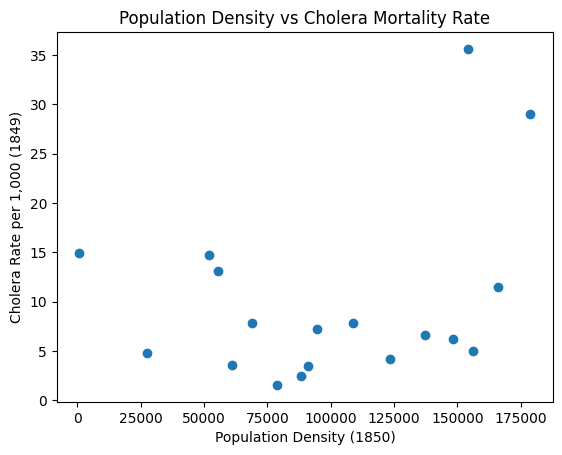

In [ ]:
# Create a scatterplot to examine relationship between population density and cholera mortality

# Remove rows with missing values in either variable
subset = df[["pop_density_1850", "cholera_1849_rate_per_1000"]].dropna()

plt.figure()
plt.scatter(subset["pop_density_1850"], subset["cholera_1849_rate_per_1000"])

plt.xlabel("Population Density (1850)")
plt.ylabel("Cholera Rate per 1,000 (1849)")
plt.title("Population Density vs Cholera Mortality Rate")

plt.show()

In [ ]:
# Pearsons correlation coefficient
subset[["pop_density_1850", "cholera_1849_rate_per_1000"]].corr()

,pop_density_1850,cholera_1849_rate_per_1000
pop_density_1850,1.000000,0.308293
cholera_1849_rate_per_1000,0.308293,1.000000


Interpretation of relationship between population density and mortality rates:

The scatterplot of population density against cholera mortality rate suggests a weak positive association. Higher density ward include some of the highest morality rates (35 and 28). However, density alone is not predicting morality intensity as some high density ward are experiencing lower mortality rates and low density wards demonstrate high mortality.

This pattern indicates that while crowding may contribute to mortality risk, it does not independently account for the variation. Additional variables may interact with density to shape mortality outcomes.

Pearsons correlation coefficient returns 0.308 showing that the realtionship between variables is positive but has a modest linear association.

While higher density wards tend to exhibit higher mortality rate, density alone does not strongly predict mortality intensity. Substantial variation remains unexplained, suggesting additional variables must be considered.

## Relationship between cellar exposure and mortality rate

Examine if proportion of residents living in cellar conditions is associated with higher cholera mortality rates

variable cellar_exposure_rate_1850 selected as representing the proportion of population living in cellar conditions and accounts for adjustment to population size.

Cellar Exposure Rate Summary:
count    18.000000
mean      0.036375
std       0.015340
min       0.011824
25%       0.025806
50%       0.034674
75%       0.045404
max       0.071996
Name: cellar_exposure_rate_1850, dtype: float64


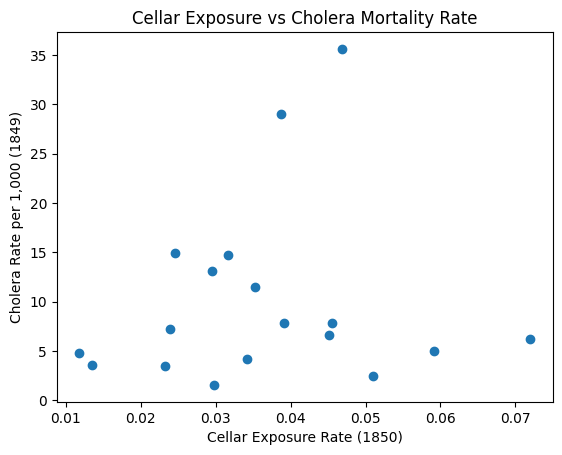

,cellar_exposure_rate_1850,cholera_1849_rate_per_1000
cellar_exposure_rate_1850,1.000000,0.108149
cholera_1849_rate_per_1000,0.108149,1.000000


In [ ]:
# Remove missing values for both variables
subset_cellar = df[["cellar_exposure_rate_1850", "cholera_1849_rate_per_1000"]].dropna()

# Summary statistics
print("Cellar Exposure Rate Summary:")
print(subset_cellar["cellar_exposure_rate_1850"].describe())

# Scatterplot
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(subset_cellar["cellar_exposure_rate_1850"],
            subset_cellar["cholera_1849_rate_per_1000"])

plt.xlabel("Cellar Exposure Rate (1850)")
plt.ylabel("Cholera Rate per 1,000 (1849)")
plt.title("Cellar Exposure vs Cholera Mortality Rate")
plt.show()

# Correlation
subset_cellar.corr()


Inerpretation of relationship between cellar exposure and mortality rates

The Pearson correlation between cellar exposure and cholera mortality rate is approximately 0.11, indicating a very week positive linear association at the ward level.

This suggested that cellar exposure alone does not strongly predict mortality intensity across the wards. The weak association may reflect interaction with other variables such as density or sewer infrastructure. Further modeling is needed to determine if cellar exposure contributes to mortality when alongside other variables.

## Relationship between sewer density and cholera mortality rates

Examine if wards with sewer infrastructure in 1847 exhibit different cholera mortality rates when compared to wards without sewer access.

Is higher sewer density associated with lower cholera mortality rates in 1849?


In [ ]:
# Examine wards with sewer infrastructure present and cholera mortality rates

# Drop missing values for relevant variables
subset_sewer = df[["sewer_present_1847", "cholera_1849_rate_per_1000"]].dropna()

# Group by sewer presence and compute mean mortality rate
mean_by_sewer = subset_sewer.groupby("sewer_present_1847")["cholera_1849_rate_per_1000"].mean()

print("Mean mortality rate by sewer presence (1847):")
print(mean_by_sewer)

Mean mortality rate by sewer presence (1847):
sewer_present_1847
0.0     9.791716
1.0    10.013207
Name: cholera_1849_rate_per_1000, dtype: float64


Mean mortality rate for sewer presence is about the same 0 = no sewer with a mean of 9.8 and 1 = sewer present with a mean of 10.0. The average mortality rates for wards with sewers versus wards without sewers is roughly the same.

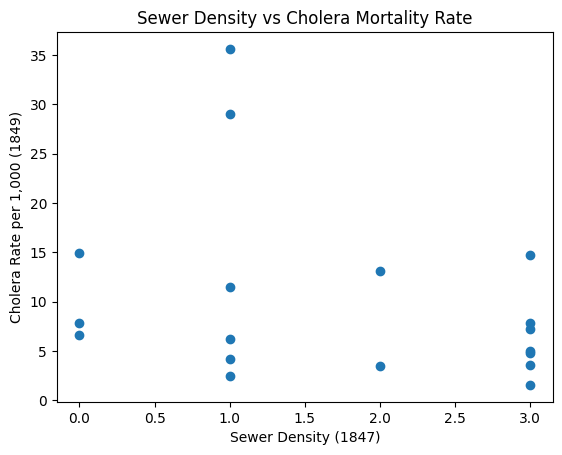

,sewer_density_1847,cholera_1849_rate_per_1000
sewer_density_1847,1.000000,-0.290719
cholera_1849_rate_per_1000,-0.290719,1.000000


In [ ]:
# Examine if sewer density by ward gives more insight into relationship between sewer and mortality

subset_sewer_density = df[["sewer_density_1847", "cholera_1849_rate_per_1000"]].dropna()

# Scatterplot
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(subset_sewer_density["sewer_density_1847"],
            subset_sewer_density["cholera_1849_rate_per_1000"])

plt.xlabel("Sewer Density (1847)")
plt.ylabel("Cholera Rate per 1,000 (1849)")
plt.title("Sewer Density vs Cholera Mortality Rate")

plt.show()

# Correlation
subset_sewer_density.corr()


Interpretation of cholera rates and sewer density:

Scatterplot shows that there is a spread but high mortality wards cluster around low to moderate sewer density, while wards with higher sewer density do not show extreme high mortality.

Correlation is -0.29 showing that as sewer density increase, mortality decreases. These variables have a weak to moderate relationship.

## Relationship between sewer density and population density

Examine if sewer density is associated with population density.

In [ ]:
sewer_pop_subset = df[["sewer_density_1847", "pop_density_1850"]].dropna()

# Correlation
sewer_pop_subset.corr()

,sewer_density_1847,pop_density_1850
sewer_density_1847,1.000000,-0.311918
pop_density_1850,-0.311918,1.000000


Interpretation of sewer density findings:

The correlation between sewer density and cholera mortality rate is negative (-0.29), suggesting that wards with greater sewer infrastructure experienced slightly lower mortality rates.

Sewer density is also negatively correlated with population density (-0.31). This indicated that sewer construction was not concentrated in the most densely populated wards.

## Exploratory Correlation Matrix

To understand how key variables of population density, sewer density and cholera rate relate to eachother.

In [ ]:
key_vars = [
    "pop_density_1850",
    "sewer_density_1847",
    "cholera_1849_rate_per_1000"
]

df[key_vars].corr()

,pop_density_1850,sewer_density_1847,cholera_1849_rate_per_1000
pop_density_1850,1.000000,-0.311918,0.308293
sewer_density_1847,-0.311918,1.000000,-0.290719
cholera_1849_rate_per_1000,0.308293,-0.290719,1.000000


Summary findings:

1. Population density vs mortality rate = 0.308. This suggested that density modestly increases cholera mortality.
2. Sewer density vs mortality rate = -0.291. Sewer density modestly decreases mortality.
3. Sewer density vs population density = -0.312. Sewer installation was not concentrated in the densest wards.


## Relationship between water infrastructure and cholera mortality

Examine if Croton water distribution is associated with cholera mortality. Correlations between hydrant density, stopcock density, and mortality rate.

Hydrants and stopcocks represent water distribution infrastructure and capture access to piped water and pressure control.

Are wards with more water infrastructure associated with higher or lower cholera mortality rates?



In [ ]:
water_vars = [
    "hydrant_density_1850",
    "stopcock_density_1850",
    "cholera_1849_rate_per_1000",

]

df[water_vars].corr()

,hydrant_density_1850,stopcock_density_1850,cholera_1849_rate_per_1000
hydrant_density_1850,1.000000,0.924416,-0.357676
stopcock_density_1850,0.924416,1.000000,-0.191460
cholera_1849_rate_per_1000,-0.357676,-0.191460,1.000000


Water variables correlation interpretation:

Hydrant density and stopcock density = 0.924. This is very high positive correlation meaning that wards with more hydrants also have more stopcocks. These variables are highly correlated with each other, indicating they capture the same water distribution network.

Hydrant density and mortality = -0.357 signifying a moderate negative relationship. This suggests that wards with greater Croton water infrastructure tended to experience lower mortality rates in 1849.

Stopcock density and mortality rate = -0.191 signifying a weak negative relationship.

Wards with more Croton water infrastructure tend to have lower cholera mortality rates in 1849.

## Preliminary Descriptive Findings



Population density shows uneven distributions across wards. Mortality rates across wards show spatial variation. Most wards experience moderate mortality rates, but two wards display extremely high mortality, suggesting spatial concentration instead of uniform disease impact.

Ward 6 exhibited both the highest total death count and the highest mortality rate. This indicates that its elevated morality burden was not solely a function of population size, but reflected an usually high mortality intensity relative to its population.

Population density in 1850 shows a modest positive association with cholera mortality rates. More densely populated wards tended to experience higher mortality. Though the relationship is not strong suggesting population density alone does not explain mortality rates.

Cellar exposure rates show only a very weak association with cholera mortality rates in 1849. While contemporaneous account emphasize cellar habitation as a site of disease concentration, ward-level mortality patterns do not show a strong direct relationship with cellar exposure rates.

Sewer density in 1847 shows a modest negative association with mortality, suggesting that wards with more extensive sewer infrastructure tended to experience lower cholera mortality rates. Furthermore, sewer density shows a modest negative association with population density indicating that sewer construction was not concentrated in the most densely populated wards.

Water distribution infrastructure, measured by stopcocks and hydrant density, is highly internally correlated and moderately negatively associated with mortality. Indicating that wards with greater Croton water infrastructure tended to experience lower mortality rates in 1849.